In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tỉ lệ giới tính qua các năm

In [3]:
df = pd.read_csv('../result_data/final_v1.csv') 


In [4]:
df

,mssv,gioitinh,hedt_ CLC,hedt_ CNTN,hedt_ CQUI,hedt_ CTTT,hedt_ KSTN,khoa_CNPM,khoa_HTTT,khoa_KHMT,...,hocky,namhoc,sotchk,hocky_sx,dtbtl,drltl,dtbhk_truoc,drlhk_truoc,sotctl,xeploai
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,0,0,1,0,0,1,0,0,...,2,2013,18,2,6.020000,5,6.02,5,22.0,2
1,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,0,0,1,0,0,1,0,0,...,1,2014,26,3,6.525000,4,7.03,3,40.0,1
2,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,0,0,1,0,0,1,0,0,...,2,2014,19,4,6.483333,4,6.40,3,66.0,2
3,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,0,0,1,0,0,1,0,0,...,1,2015,20,5,6.615000,4,7.01,4,85.0,1
4,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1.0,0,0,1,0,0,1,0,0,...,2,2015,19,6,6.562000,4,6.35,5,105.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56180,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,0,0,1,0,0,0,0,1,...,1,2020,21,3,7.250000,3,6.95,3,28.0,2
56181,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,0,0,1,0,0,0,0,1,...,2,2020,22,4,7.320000,3,7.46,3,49.0,3
56182,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,0,0,1,0,0,0,0,1,...,1,2021,22,5,7.535000,3,8.18,4,71.0,2
56183,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,1.0,0,0,1,0,0,0,0,1,...,2,2021,14,6,7.548000,4,7.60,5,93.0,2


In [5]:
df_gioitinh = df.loc[:,['mssv', 'gioitinh', 'khoahoc']]
df_gioitinh = df_gioitinh.drop_duplicates()
gender_counts = df_gioitinh.groupby('khoahoc')['gioitinh'].value_counts(normalize=True)
gender_counts = gender_counts.rename('proportion').reset_index()


In [6]:
hue_order = [0, 1]
gender_counts['gioitinh'] = gender_counts['gioitinh'].replace({1: 'Nam', 0: 'Nữ'})

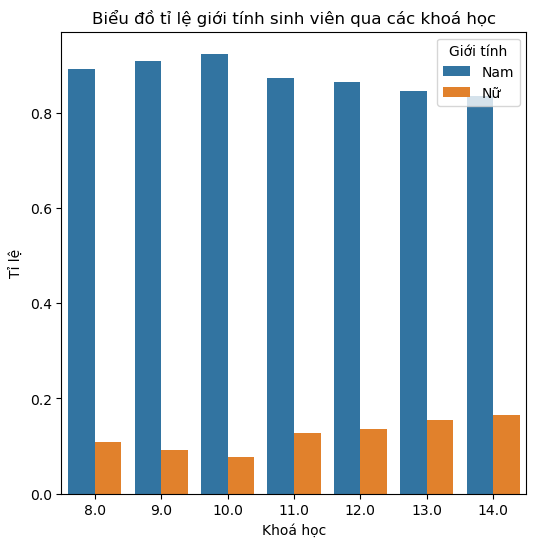

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='khoahoc', y='proportion', hue='gioitinh', data=gender_counts,ax=ax)
plt.legend(title='Giới tính', loc='upper right')
plt.title('Biểu đồ tỉ lệ giới tính sinh viên qua các khoá học')
plt.xlabel('Khoá học')
plt.ylabel('Tỉ lệ')
plt.show()

**Nhận xét**
- Tỉ lệ nam và nữ ở trường UIT có sự chênh lệch rõ ràng thường là 9-1 hoặc 8-2
- Những năm trở lại đây, tỉ lệ sinh viên là nữ có sự tăng trưởng.

# Tỉ lệ hệ đào tạo qua các năm

In [8]:
hedt = [col for col in df.columns if col.startswith("hedt")]
df_hdt = df.loc[:,['mssv', 'khoahoc'] + hedt]
df_hdt = df_hdt.drop_duplicates()


In [9]:
table = pd.pivot_table(df_hdt, values=hedt, index='khoahoc',aggfunc=np.sum)

In [10]:
df_hdt_new = table.reset_index()
df_hdt_new

,khoahoc,hedt_ CLC,hedt_ CNTN,hedt_ CQUI,hedt_ CTTT,hedt_ KSTN
0,8.0,32,23,828,16,21
1,9.0,121,28,779,25,20
2,10.0,266,27,661,48,20
3,11.0,248,23,672,34,28
4,12.0,411,21,576,31,21
5,13.0,602,26,683,51,26
6,14.0,812,28,741,72,30


In [11]:
total_students = df_hdt_new[hedt].sum(axis=1)
total_students

0     920
1     973
2    1022
3    1005
4    1060
5    1388
6    1683
dtype: int64

In [12]:
for he in hedt:
    df_hdt_new[he + '_ratio'] = df_hdt_new[he] / total_students
df_hdt_new.drop(columns=hedt, inplace=True)


In [13]:
df_hdt_new

,khoahoc,hedt_ CLC_ratio,hedt_ CNTN_ratio,hedt_ CQUI_ratio,hedt_ CTTT_ratio,hedt_ KSTN_ratio
0,8.0,0.034783,0.025000,0.900000,0.017391,0.022826
1,9.0,0.124358,0.028777,0.800617,0.025694,0.020555
2,10.0,0.260274,0.026419,0.646771,0.046967,0.019569
3,11.0,0.246766,0.022886,0.668657,0.033831,0.027861
4,12.0,0.387736,0.019811,0.543396,0.029245,0.019811
5,13.0,0.433718,0.018732,0.492075,0.036744,0.018732
6,14.0,0.482472,0.016637,0.440285,0.042781,0.017825


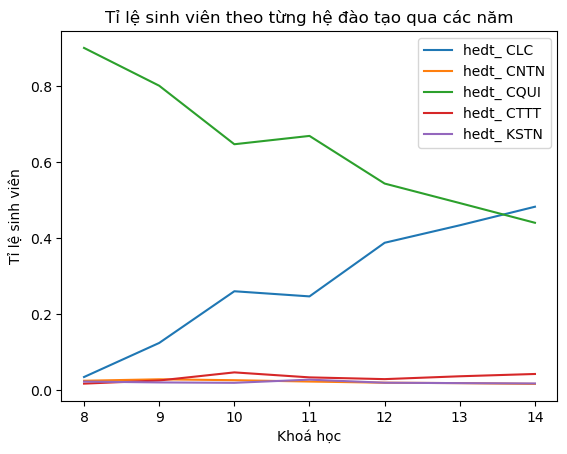

In [14]:
for he in hedt:
    plt.plot(df_hdt_new['khoahoc'], df_hdt_new[he + '_ratio'], label=he)
plt.xlabel('Khoá học')
plt.ylabel('Tỉ lệ sinh viên')
plt.title('Tỉ lệ sinh viên theo từng hệ đào tạo qua các năm')
plt.legend()
plt.show()

**Nhận xét**

# Tỉ lệ sinh viên trong các khoa

In [15]:
khoa = [col for col in df.columns if col.startswith("khoa_")]
df_khoa = df.loc[:,['mssv', 'khoahoc'] + khoa]
df_khoa = df_khoa.drop_duplicates()

In [16]:
table = pd.pivot_table(df_khoa, values=khoa, index='khoahoc',aggfunc=np.sum)
df_khoa_new = table.reset_index()
total_students = df_khoa_new[khoa].sum(axis=1)
for k in khoa:
    df_khoa_new[k + '_ratio'] = df_khoa_new[k] / total_students
df_khoa_new.drop(columns=khoa, inplace=True)
df_khoa_new

,khoahoc,khoa_CNPM_ratio,khoa_HTTT_ratio,khoa_KHMT_ratio,khoa_KTMT_ratio,khoa_KTTT_ratio,khoa_MMT&TT_ratio
0,8.0,0.209783,0.131522,0.192391,0.126087,0.079348,0.260870
1,9.0,0.197328,0.202467,0.147996,0.164440,0.082220,0.205550
2,10.0,0.211350,0.227006,0.128180,0.136008,0.084149,0.213307
3,11.0,0.194030,0.222886,0.159204,0.133333,0.089552,0.200995
4,12.0,0.207547,0.261321,0.108491,0.109434,0.091509,0.221698
5,13.0,0.129683,0.190922,0.162104,0.111671,0.198847,0.206772
6,14.0,0.141414,0.214498,0.161616,0.107546,0.174688,0.200238


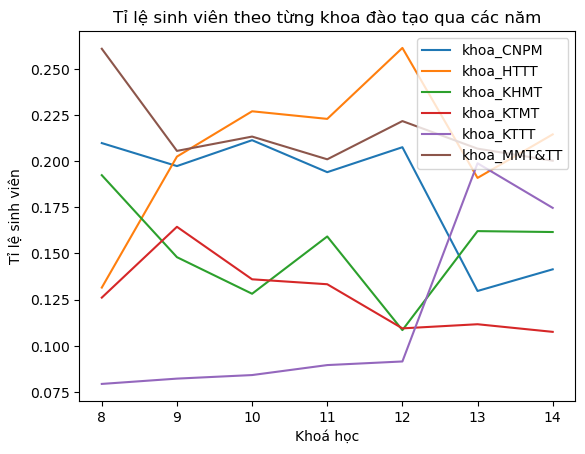

In [17]:
for k in khoa:
    plt.plot(df_khoa_new['khoahoc'], df_khoa_new[k + '_ratio'], label=k)
plt.xlabel('Khoá học')
plt.ylabel('Tỉ lệ sinh viên')
plt.title('Tỉ lệ sinh viên theo từng khoa đào tạo qua các năm')
plt.legend()
plt.show()

# Tỉ lệ sinh viên từ các khu vực Việt Nam 

In [18]:
khuvuc = [col for col in df.columns if col.startswith("khuvuc")]
df_khuvuc = df.loc[:,['mssv', 'khoahoc'] + khuvuc]
df_khuvuc = df_khuvuc.drop_duplicates()

In [19]:
table = pd.pivot_table(df_khuvuc, values=khuvuc, index='khoahoc',aggfunc=np.sum)
df_khuvuc_new = table.reset_index()
total_students = df_khuvuc_new[khuvuc].sum(axis=1)
for kv in khuvuc:
    df_khuvuc_new[kv + '_ratio'] = df_khuvuc_new[kv] / total_students
df_khuvuc_new.drop(columns=khuvuc, inplace=True)
df_khuvuc_new

,khoahoc,khuvuc_1.0_ratio,khuvuc_2.0_ratio,khuvuc_3.0_ratio,khuvuc_4.0_ratio,khuvuc_5.0_ratio,khuvuc_6.0_ratio,khuvuc_7.0_ratio
0,8.0,0.001087,0.011957,0.266304,0.157609,0.017391,0.404348,0.141304
1,9.0,0.003083,0.030832,0.248715,0.134635,0.002055,0.386434,0.194245
2,10.0,0.006849,0.028376,0.244618,0.136986,0.002935,0.380626,0.199609
3,11.0,0.000000,0.016915,0.276617,0.189055,0.018905,0.338308,0.160199
4,12.0,0.000943,0.012264,0.246226,0.143396,0.014151,0.387736,0.195283
5,13.0,0.004323,0.012248,0.238473,0.157061,0.013689,0.415706,0.158501
6,14.0,0.003565,0.010101,0.239453,0.156269,0.014854,0.380273,0.195484


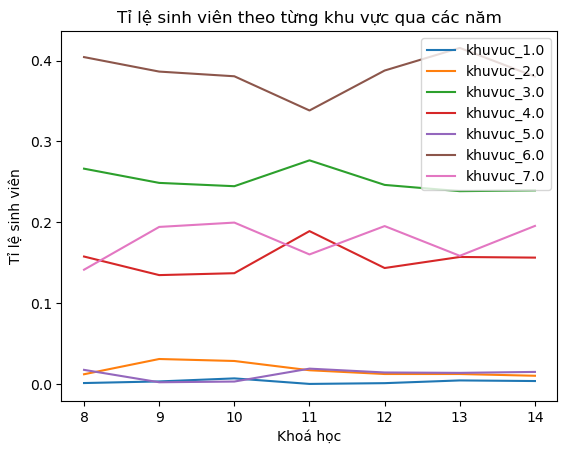

In [20]:
for kv in khuvuc:
    plt.plot(df_khuvuc_new['khoahoc'], df_khuvuc_new[kv + '_ratio'], label=kv)
plt.xlabel('Khoá học')
plt.ylabel('Tỉ lệ sinh viên')
plt.title('Tỉ lệ sinh viên theo từng khu vực qua các năm')
plt.legend()
plt.show()